In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import graphviz

data = pd.read_csv('./telco.csv')

# data = pd.read_csv('./telco2.csv')
#drop after showing importance of features
# data = data.drop('State', axis='columns')

data['Churn'] = pd.Categorical(data['Churn']).codes 

non_numeric_columns = data.select_dtypes(include=['object']).columns.tolist()
data = pd.get_dummies(data, columns=non_numeric_columns, drop_first=True)

input = data.drop('Churn', axis='columns')
target = data['Churn']

input_train, input_test, target_train, target_test = train_test_split(input, target, test_size=0.25)

data

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
5,0,8,99.65,820.50,1,0,0,0,1,0,...,0,1,0,1,0,0,1,0,1,0
6,0,22,89.10,1949.40,0,1,0,1,1,0,...,0,1,0,0,0,0,1,1,0,0
7,0,10,29.75,301.90,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
8,0,28,104.80,3046.05,1,0,1,0,1,0,...,0,1,0,1,0,0,1,0,1,0
9,0,62,56.15,3487.95,0,1,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0


In [3]:
#TODO add class_weights

# classifier = LinearSVC()
# classifier = SVC()
# classifier = KNeighborsClassifier()
# classifier = DecisionTreeClassifier() #min_samples_leaf=0.01, max_depth=3
classifier = RandomForestClassifier(n_estimators=50) #oob_score=True


classifier.fit(input_train, target_train)

predicted_churn = classifier.predict(input_test)
print('Accuracy:', metrics.accuracy_score(target_test, predicted_churn))
#print('Random Forest Accuracy:', classifier.oob_score_)

Accuracy: 0.7758816837315131


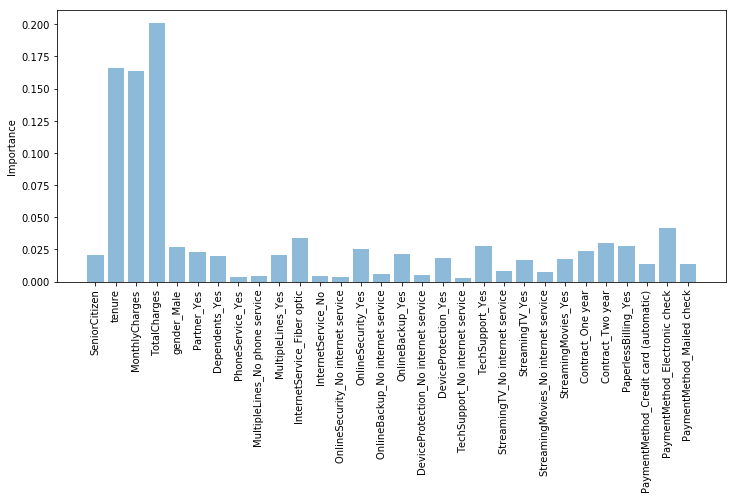

In [4]:
np.arange(5)

y_pos = range(len(input.columns))

plt.bar(y_pos, classifier.feature_importances_, align='center', alpha=0.5)
plt.xticks(y_pos, list(input), rotation='vertical')
plt.ylabel('Importance')

fig = plt.gcf()
fig.set_size_inches(12, 5)
 
plt.show()

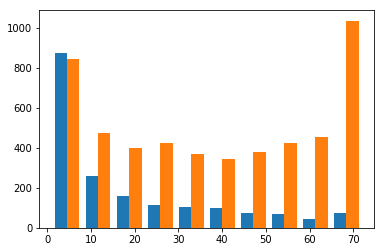

In [8]:
stayUsers = input[target == 0]
leaveUsers = input[target == 1]

histField = 'tenure'

histData = [
    list(leaveUsers[histField]),
    list(stayUsers[histField])
]

plt.hist(histData)
plt.show()



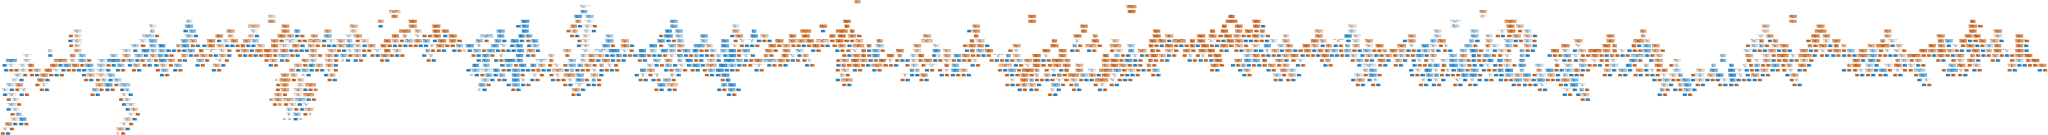

In [190]:
dot_data = tree.export_graphviz(classifier, 
    out_file=None, 
    feature_names=list(input),
    class_names=['Stay', 'Leave'], 
    filled=True,
    impurity=False)

graphviz.Source(dot_data)